In [1]:
import pickle
from pathlib import Path

from enbios.base.experiment import Experiment

In [2]:
# Open a pickled experiment object.
exp: Experiment = pickle.load(Path("exp.pickle").open("rb"))

In [3]:
from enbios.base.result_select import ResultsSelector

rs = ResultsSelector.get_result_selector(exp)
rs.base_df

scenario   GWP1000      FETP     HTPnc
0  normal scenario  0.134665  0.017350  0.136812
1       Scenario 1  0.923857  0.118700  0.900380
2       Scenario 2  0.917168  0.133047  0.989887

In [4]:
# Let's introspect the experiment
# print(exp.info())
# print(json.dumps(exp.hierarchy_root.as_dict(remove_empty_childlist=True), indent=2))

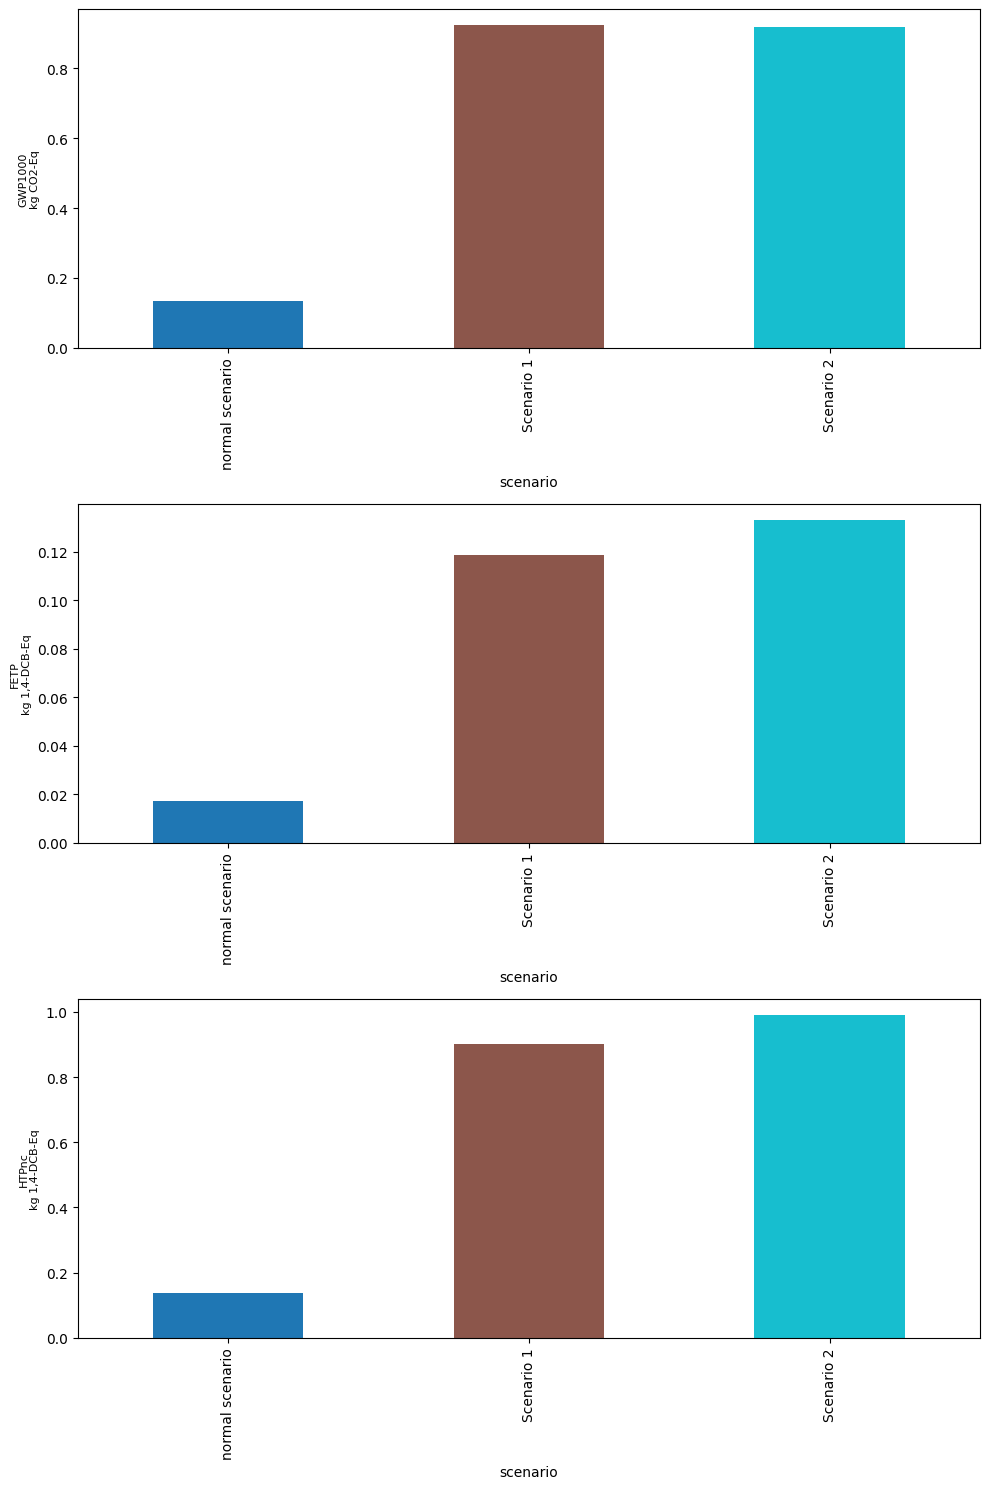

In [5]:
from enbios.plotting.plot_experiment import bar_plot

bar_plot(exp);

These are a lot of plots. Let's just plot the first two methods. For the most plotting functions we can pass two lists, one for the scenarios and one for the methods. All items of these lists must be aliases of the corresponding collection. We can these aliases with `Experiment.scenario_aliases` and  `Experiment.method_aliases`  

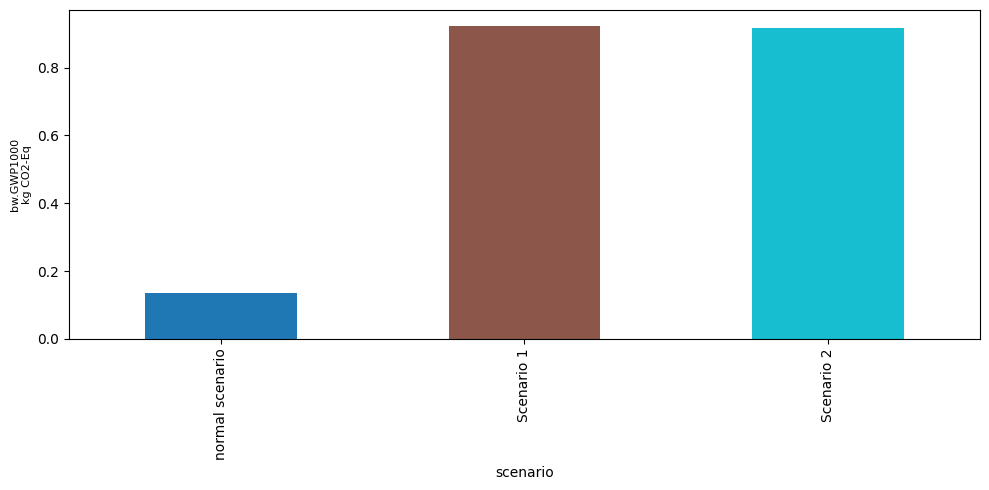

In [6]:
# just plot the first method
bar_plot(exp, methods=exp.methods[:1]);

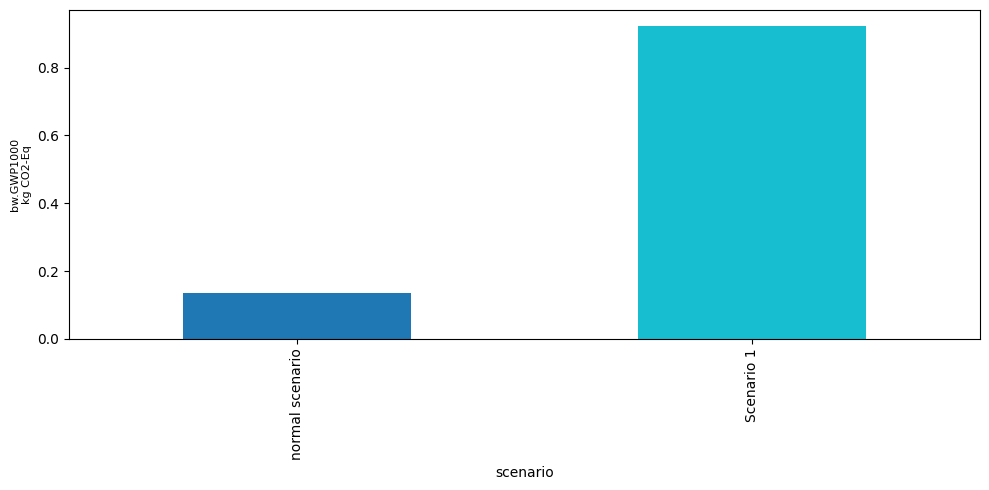

In [7]:
# just plot the first three scenarios for the first method.
bar_plot(exp, scenarios=exp.scenario_names[:2], methods=exp.methods[:1]);

Next, we inspect the values of part of the hierarchy. We can do that with the 'stacked_bar_plot' method. Besides the selection of the scenarios and the methods, there are two ways to select which nodes in the hierarchy should be selected.
By default, it selects all nodes on `level = 1`, which are all nodes just below the root. By passing a `level` parameter, we can select another level.

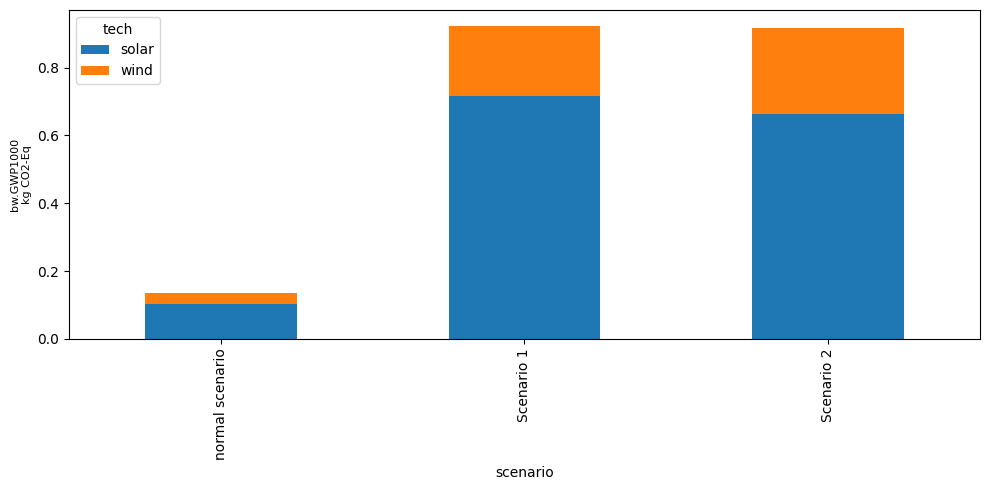

In [8]:
from enbios.plotting.plot_experiment import stacked_bar_plot

stacked_bar_plot(exp, methods=exp.methods[:1]);

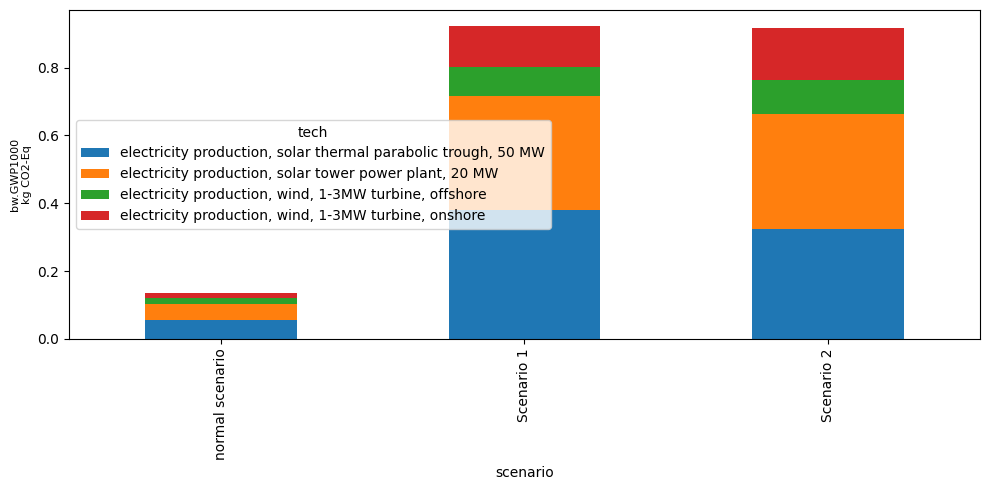

In [9]:
stacked_bar_plot(exp, methods=exp.methods[:1], level=2);

['electricity production, wind, 1-3MW turbine, onshore', 'electricity production, wind, 1-3MW turbine, offshore', 'electricity production, solar tower power plant, 20 MW', 'electricity production, solar thermal parabolic trough, 50 MW']


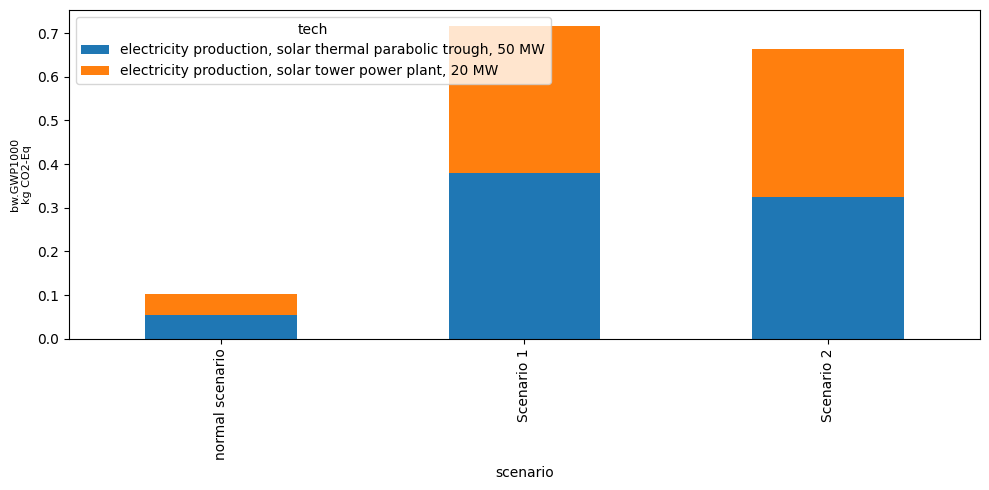

In [10]:
print(exp.structural_nodes_names)
stacked_bar_plot(
    exp,
    methods=exp.methods[:1],
    nodes=[
        "electricity production, solar tower power plant, 20 MW",
        "electricity production, solar thermal parabolic trough, 50 MW",
    ],
);

Next comes a starplot, which normalized the values into the range between the lowest and highest values for each method. Note that for the normalization all scenarios are considered, not just the ones that are selected for plotting. 

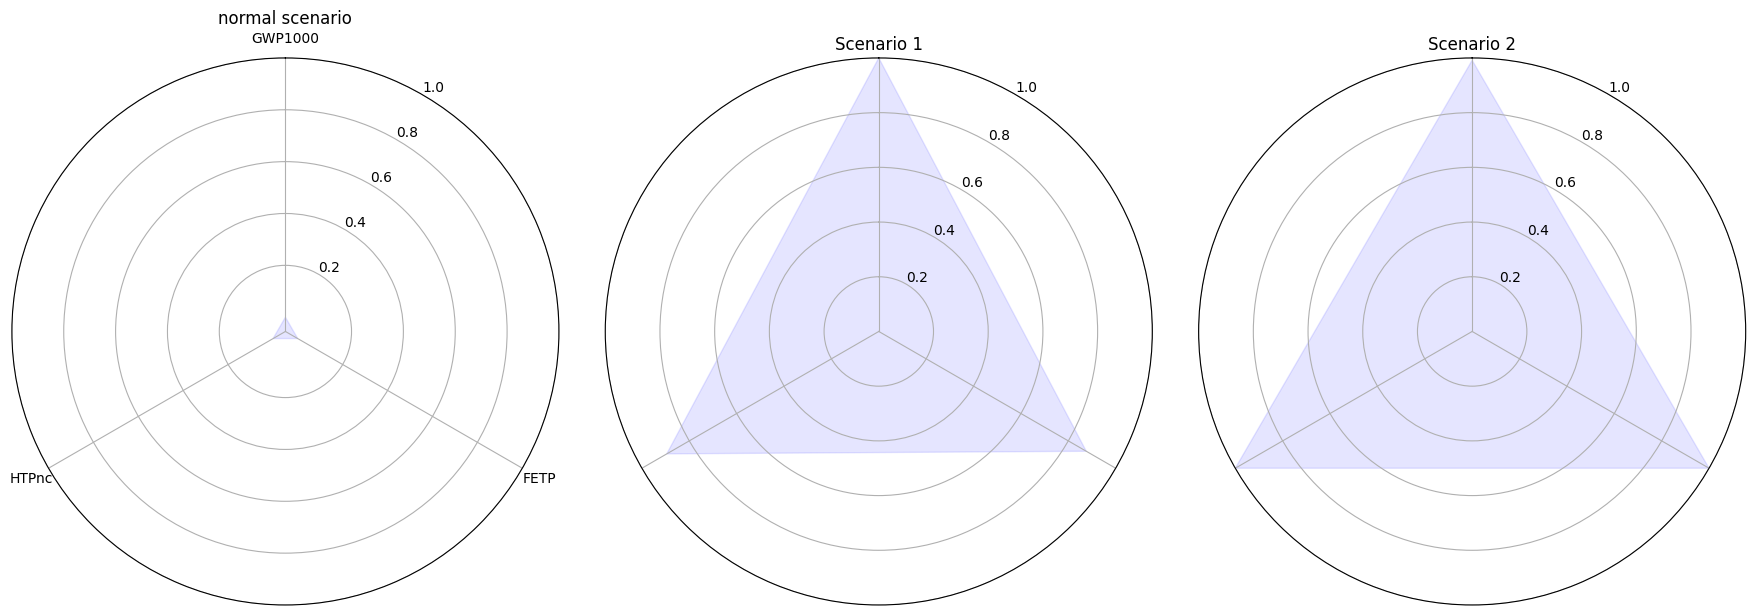

In [11]:
from enbios.plotting.plot_experiment import star_plot

star_plot(exp, fill=True);

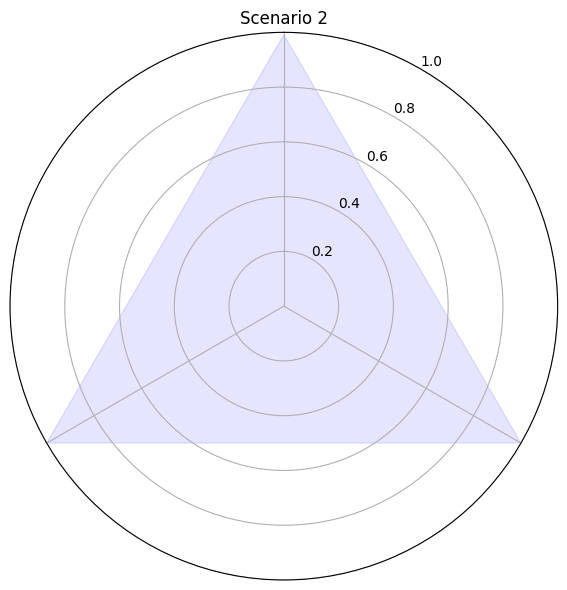

In [12]:
star_plot(exp, scenarios=[exp.scenario_names[2]], show_labels=False);

We can also plot multiple scenarios into one plot.

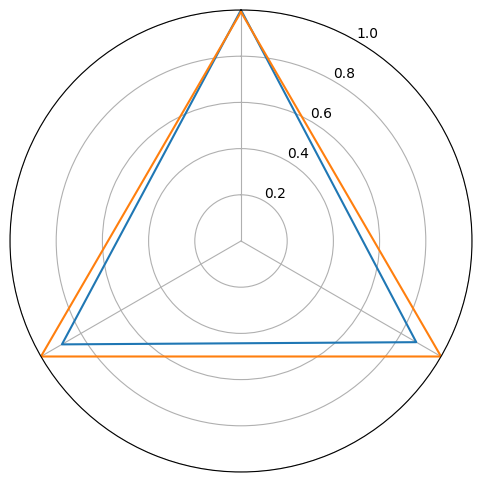

In [13]:
from enbios.plotting.plot_experiment import single_star_plot

single_star_plot(
    exp, scenarios=[exp.scenario_names[1], exp.scenario_names[2]], show_labels=False
);

A heatmap also normalizes the values. 

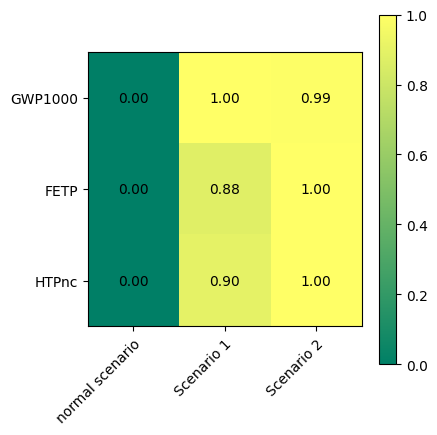

In [14]:
from enbios.plotting.plot_experiment import plot_heatmap

plot_heatmap(exp);

Instead of using normalized, we can also pass specific values. For example can we compare the values to some baseline values. All plotting functions use a `ResultsSelector` class in the background for filtering the scenarios, methods or tree-nodes. It also has a function to compare the values to a baseline (`compare_to_baseline`), which should be a numpy array with the same length as the number of methods. The result can be passed to the plotting functions as `special_df`.  

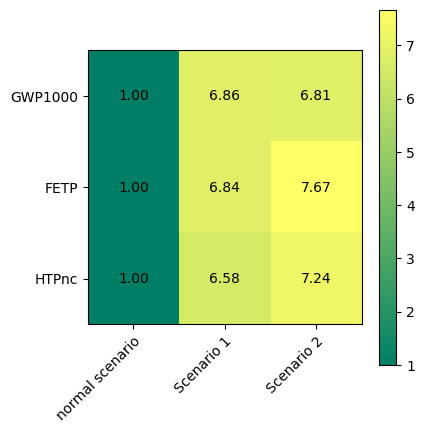

In [15]:
import numpy as np

rs = ResultsSelector.get_result_selector(exp)

df = rs.base_df
df = rs.compare_to_baseline(np.array(df.min()[1:]))
plot_heatmap(exp, special_df=df);

Finally, we have a rudiementary sankey plot. It is not very flexible yet, but it can be useful to get a quick overview of the flows.

In [16]:
from enbios.plotting.plot_experiment import plot_sankey

plot_sankey(exp, "Scenario 1", exp.methods[0])

In [20]:
from plotly.graph_objs import Figure as PlotlyFigure
from enbios.plotting.plot_experiment import plot_sankey

# we can add a colormap for the bars.
# Also note the return type of the function. The figure coming from the plotly library can be saved to various formats

sanky: PlotlyFigure = plot_sankey(exp, "Scenario 1", exp.methods[0], color_map={
    "solar": "green",
    "wind": "darkblue"
})

sanky.write_html("sanky.html")
sanky

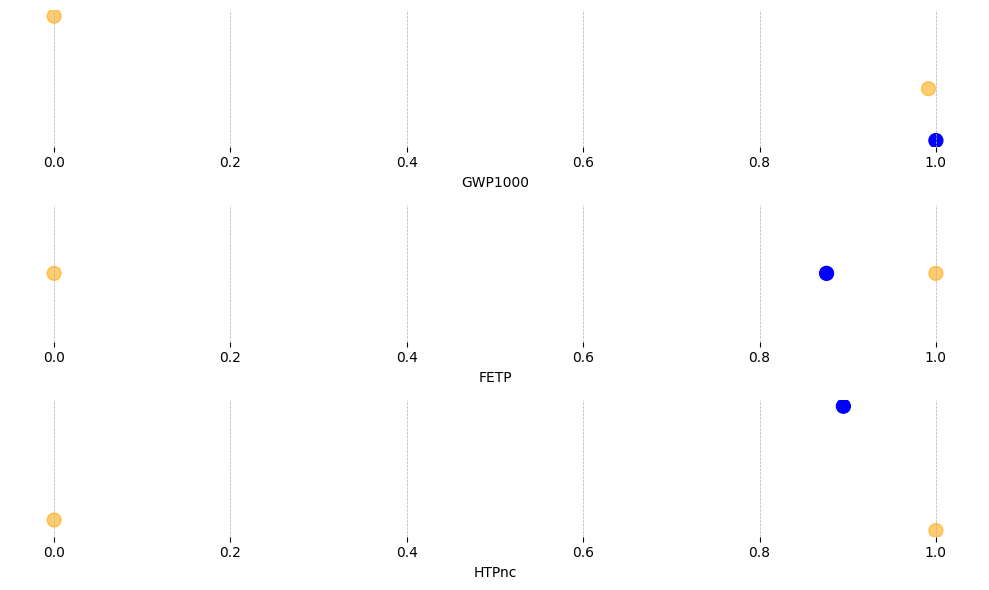

In [21]:
from enbios.plotting.plot_experiment import one_axes_scatter_plot

one_axes_scatter_plot(exp, "Scenario 1");

## Plotting uncertainties

Plotting experiments, where each node has multiple values (e.g. through brightway uncertainty analysis) can also be plotted. The uncertainty experiment notebook has been run and the experiment stored 

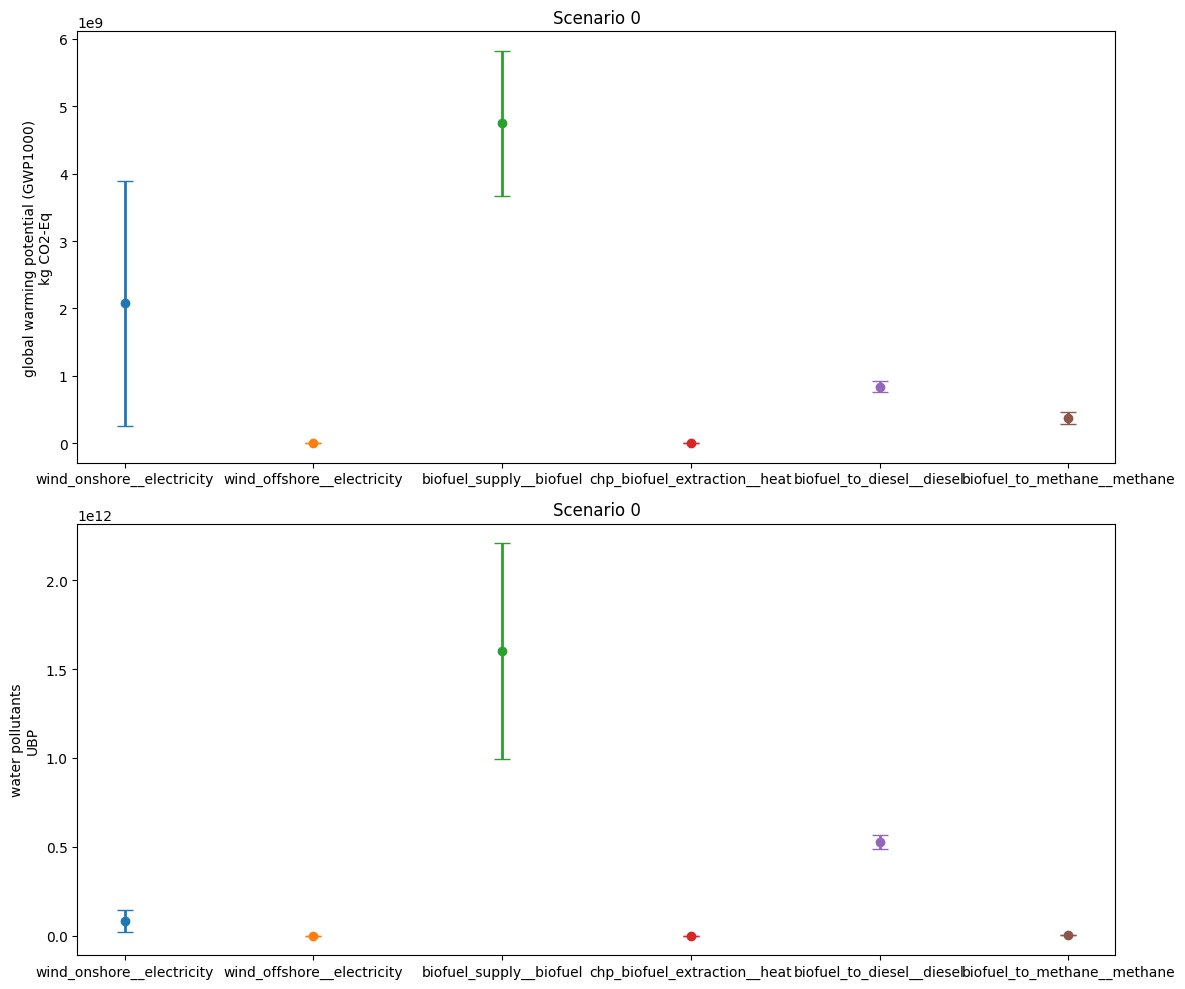

In [22]:
from enbios.plotting.plot_experiment import plot_multivalue_results

uncertainty_experiment_file = Path("data/uncertainty_experiment.pickle")

if uncertainty_experiment_file.exists():
    import pickle

    exp: Experiment = pickle.load(open(uncertainty_experiment_file, "rb"))
    plot_multivalue_results(exp, level=3);
    # alternatively we can pass a custum function that calculates the error from a nparray
    # plot_multivalue_results(exp,level=3, err_method= lambda values: np.std(values) / np.sqrt(len(values)));
    # like before we could select specific scenarios, methods and nodes